# Hosue Price Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge


from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

matplotlib.rcParams["figure.figsize"] = (12, 12)
import warnings
warnings.filterwarnings(action='ignore')

# Data Loading

In [2]:

df = pd.read_csv('kc_house_data.csv')

# Print first five rows of the table
df.head(5) 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#Display number of rows and number of columns

In [4]:
df.shape

(21613, 21)

In [5]:
#display column namnes

In [9]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
#Dispaly column data tyeps

In [11]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# Column Description


In [12]:
print("Column Name   Unique Values")
print("-----------   -------------")
for column in df.columns:
    if(df[column].dtypes != df['floors'].dtypes and df[column].dtypes != df['price'].dtypes):
        print(column + ': \t' + str(df[column].nunique()))

Column Name   Unique Values
-----------   -------------
id: 	21436
date: 	372
bedrooms: 	13
sqft_living: 	1038
sqft_lot: 	9782
waterfront: 	2
view: 	5
condition: 	5
grade: 	12
sqft_above: 	946
sqft_basement: 	306
yr_built: 	116
yr_renovated: 	70
zipcode: 	70
sqft_living15: 	777
sqft_lot15: 	8689


In [13]:
#Dispaly null values in each column

In [14]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [15]:
# Display the Correlation Matrix

In [16]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [17]:
# Plot the Correlation Matrix

<AxesSubplot:>

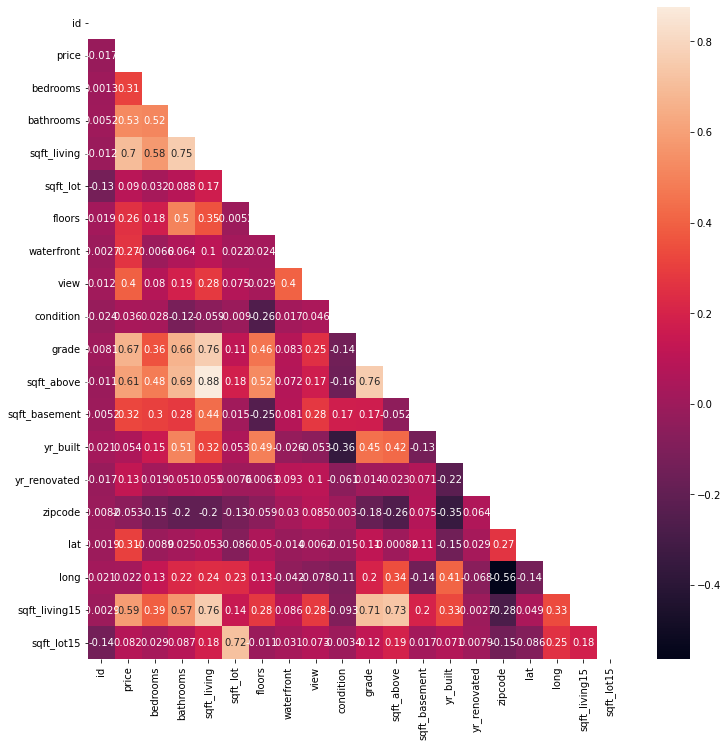

In [18]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, mask=matrix)

In [19]:
#Dispaly Each numerical column Histrogram

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

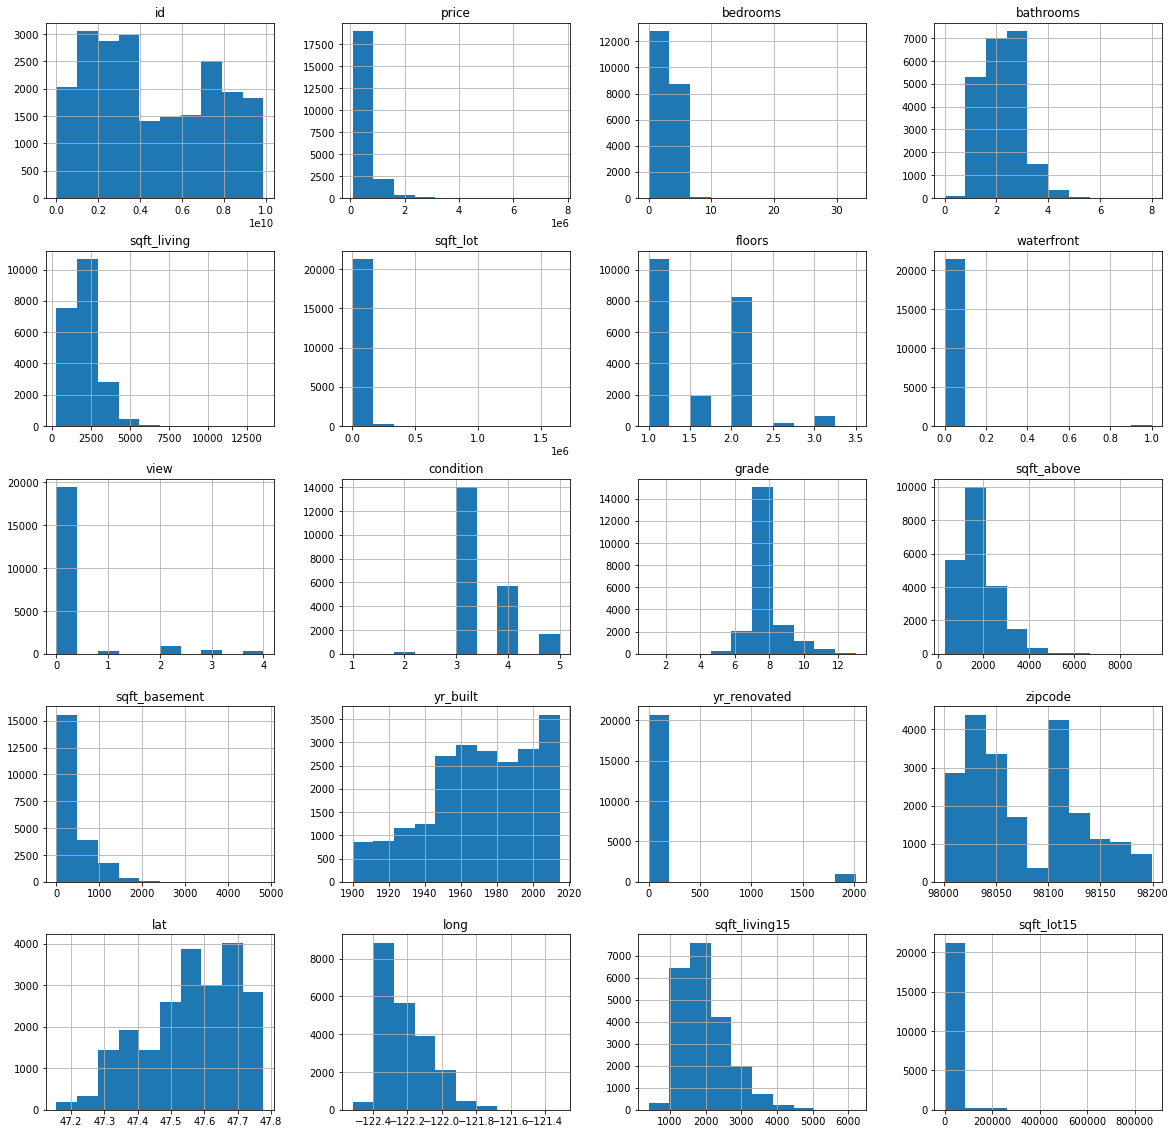

In [20]:
df.hist(figsize=(20, 20))

In [21]:
#Display each column Boxplota

<AxesSubplot:xlabel='long'>

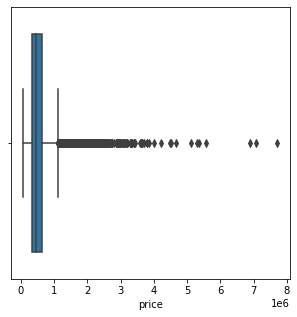

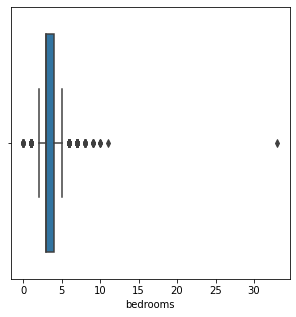

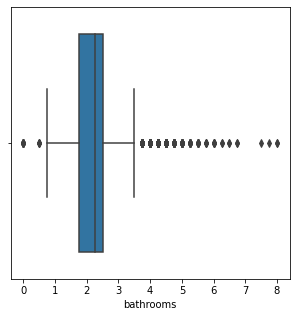

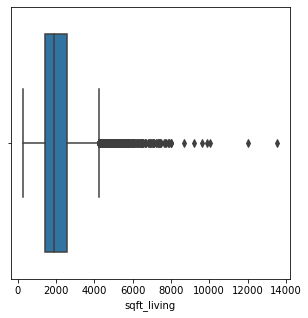

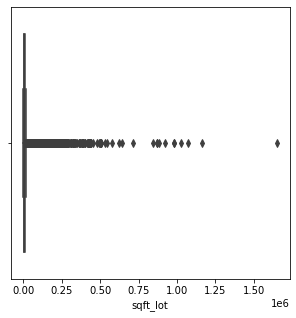

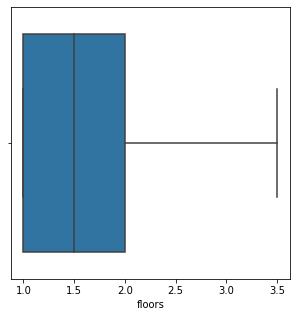

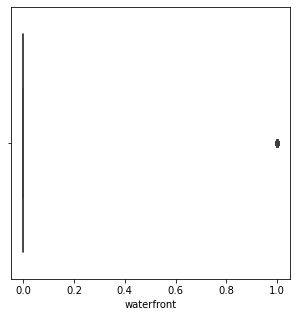

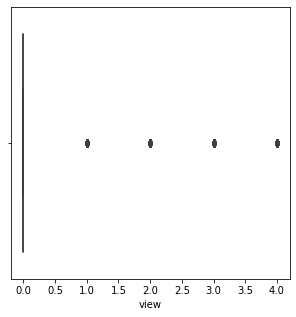

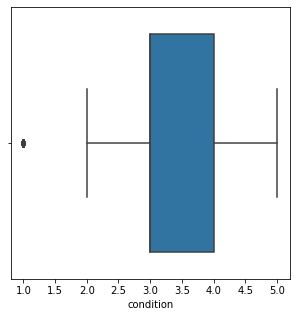

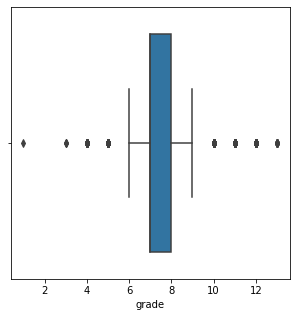

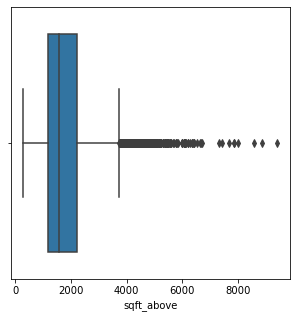

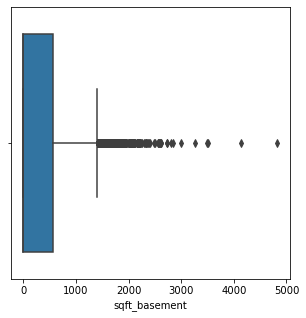

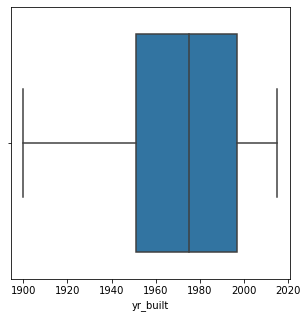

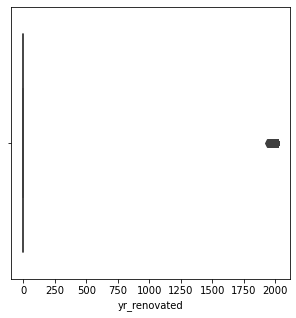

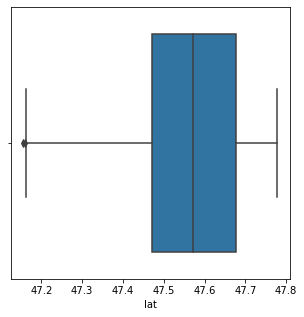

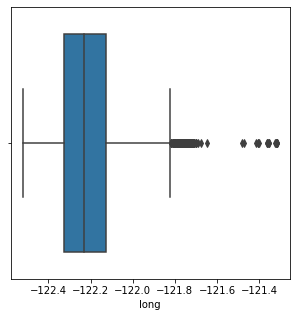

In [22]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df['price'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['bedrooms'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['bathrooms'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['sqft_living'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['sqft_lot'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['floors'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['waterfront'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['view'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['condition'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['grade'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['sqft_above'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['sqft_basement'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['yr_built'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['yr_renovated'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['lat'])

plt.figure(figsize=(5, 5))
sns.boxplot(x=df['long'])


In [23]:
#Dispaly statics of each column

In [24]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Celaning Data

In [25]:
#Drop unwanted features that do not required to build the model
#Name the new data frame as df1

In [86]:
df1 = df.drop(['id', 'zipcode', 'date', 'waterfront', 'view', 'yr_renovated'],
               axis='columns')

In [87]:
# Print first five rows of the new data frame

In [88]:
df1.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,47.6168,-122.045,1800,7503


# Remove Outliers using Inter Quartile Range

In [89]:
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'lat', 'long', 'grade', 'sqft_above', 'sqft_basement', 
        'yr_built']

Q1 = df1[cols].quantile(0.25)
Q3 = df1[cols].quantile(0.75)
IQR = Q3 - Q1

df2 = df1[~((df1[cols] < (Q1 - 1.5 * IQR)) | (df1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Normalization and Standardlization of Data

In [90]:
#Convert floors, bathrooms and price into integers.

In [91]:
df2['floors'] = df2['floors'].astype('int64')
df2['bathrooms'] = df2['bathrooms'].astype('int64')
df2['price'] = df2['price'].astype('int64')

In [92]:
df2.dtypes

price              int64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors             int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [93]:
#view if there any houses with more bathrooms than bedrooms count+2,
#It is uncommom

In [94]:
df3 = df1[df1.bathrooms > df1.bedrooms + 2]

In [95]:
df3.shape

(3, 15)

In [96]:
df1.shape

(21613, 15)

In [97]:
#Turn all numerical values of a range between 0 and 1 
#by deviding values from Maximum of the column

In [98]:
df4 = df2.copy()

df4['price'] = df2['price'] / df2['price'].max()
df4['bedrooms'] = df2['bedrooms'] / df2['bedrooms'].max()
df4['bathrooms'] = df2['bathrooms'] / df2['bathrooms'].max()
df4['sqft_living'] = df2['sqft_living'] / df2['sqft_living'].max()
df4['sqft_lot'] = df2['sqft_lot'] / df2['sqft_lot'].max()
df4['floors'] = df2['floors'] / df2['floors'].max()
df4['condition'] = df2['condition'] / df2['condition'].max()
df4['grade'] = df2['grade'] / df2['grade'].max()
df4['sqft_above'] = df2['sqft_above'] / df2['sqft_above'].max()
df4['sqft_basement'] = df2['sqft_basement'] / df2['sqft_basement'].max()
df4['yr_built'] = df2['yr_built'] / df2['yr_built'].max()
#df4['lat'] = df2['lat'] / df2['lat'].max()
#df4['long'] = df2['long'] / df2['long'].max()
df4['sqft_living15'] = df2['sqft_living15'] / df2['sqft_living15'].max()
df4['sqft_lot15'] = df2['sqft_lot15'] / df2['sqft_lot15'].max()


df4

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,0.196894,0.6,0.333333,0.279621,0.295178,0.333333,0.6,0.777778,0.315508,0.000000,0.970223,47.5112,-122.257,0.270707,0.028740
1,0.477374,0.6,0.666667,0.609005,0.378350,0.666667,0.6,0.777778,0.580214,0.285714,0.968238,47.7210,-122.319,0.341414,0.038857
2,0.159716,0.4,0.333333,0.182464,0.522439,0.333333,0.6,0.666667,0.205882,0.000000,0.959305,47.7379,-122.233,0.549495,0.041009
3,0.535936,0.8,1.000000,0.464455,0.261219,0.333333,1.0,0.777778,0.280749,0.650000,0.975186,47.5208,-122.393,0.274747,0.025434
4,0.452529,0.6,0.666667,0.398104,0.422131,0.333333,0.6,0.888889,0.449198,0.000000,0.986104,47.6168,-122.045,0.363636,0.038166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.319432,0.6,0.666667,0.362559,0.059088,1.000000,0.6,0.888889,0.409091,0.000000,0.997022,47.6993,-122.346,0.309091,0.007676
21609,0.354925,0.8,0.666667,0.547393,0.303694,0.666667,0.6,0.888889,0.617647,0.000000,0.999504,47.5107,-122.362,0.369697,0.036624
21610,0.356789,0.4,0.000000,0.241706,0.070529,0.666667,0.6,0.777778,0.272727,0.000000,0.997022,47.5944,-122.299,0.206061,0.010209
21611,0.354925,0.6,0.666667,0.379147,0.124758,0.666667,0.6,0.888889,0.427807,0.000000,0.994541,47.5345,-122.069,0.284848,0.006547


# Split Train and Test Data

In [99]:
y = df2['price']
X = df2.drop('price', axis=1)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

# Train the model Using Ridge Regression Algotithm

In [101]:
ridgeRegressionModel = Ridge()
ridgeRegressionModel.fit(X_train, y_train)

Ridge()

In [102]:
##Test Ridge Regression Model R squared score

In [103]:
ridgeRegressionModel.score(X_test, y_test)

0.6486965073706694

# Tset the Model

In [104]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(Ridge(), X, y, cv=cv)

array([0.66062353, 0.63237097, 0.66036402, 0.65043113, 0.64944908])

# Plot

In [105]:
def DistributionPlot(RedFunction, BlueFunction):
    plt.figure(figsize=(10, 10))

    ax1 = sns.distplot(RedFunction, hist=False, color="r")
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", ax=ax1)

    plt.show()
    plt.close()

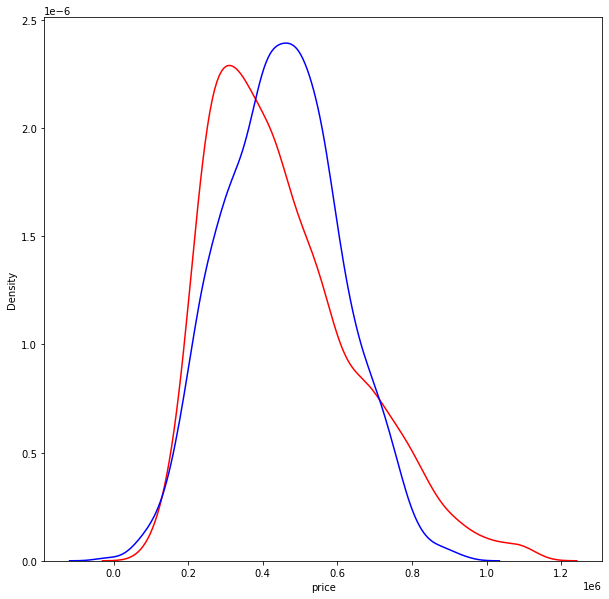

In [106]:
#predicted values of y  for X_Test values and store in 'yplot_test_ridge' variable

yplot_test_ridge = ridgeRegressionModel.predict(X_test)

# Graph for values of y  for X_Test values
DistributionPlot(y_test,yplot_test_ridge)

# LOG Transformation

In [107]:
#price transform to logged price

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

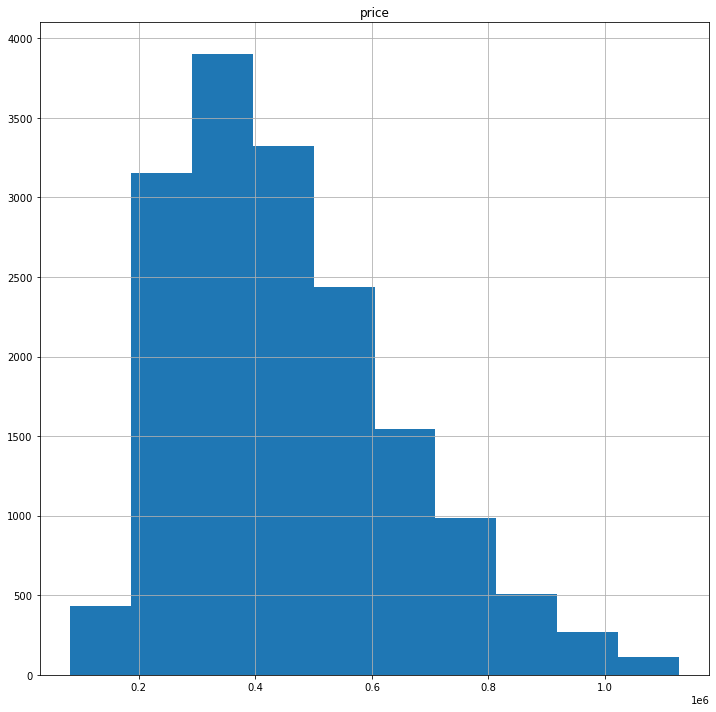

In [108]:
df2.hist(column='price')

In [109]:
df2['logged_prcie'] =np.log(df4.price)
df2.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,logged_prcie
0,221900,3,1,1180,5650,1,3,7,1180,0,1955,47.5112,-122.257,1340,5650,-1.625088
1,538000,3,2,2570,7242,2,3,7,2170,400,1951,47.7210,-122.319,1690,7639,-0.739456
2,180000,2,1,770,10000,1,3,6,770,0,1933,47.7379,-122.233,2720,8062,-1.834358
3,604000,4,3,1960,5000,1,5,7,1050,910,1965,47.5208,-122.393,1360,5000,-0.623740
4,510000,3,2,1680,8080,1,3,8,1680,0,1987,47.6168,-122.045,1800,7503,-0.792904


array([[<AxesSubplot:title={'center':'logged_prcie'}>]], dtype=object)

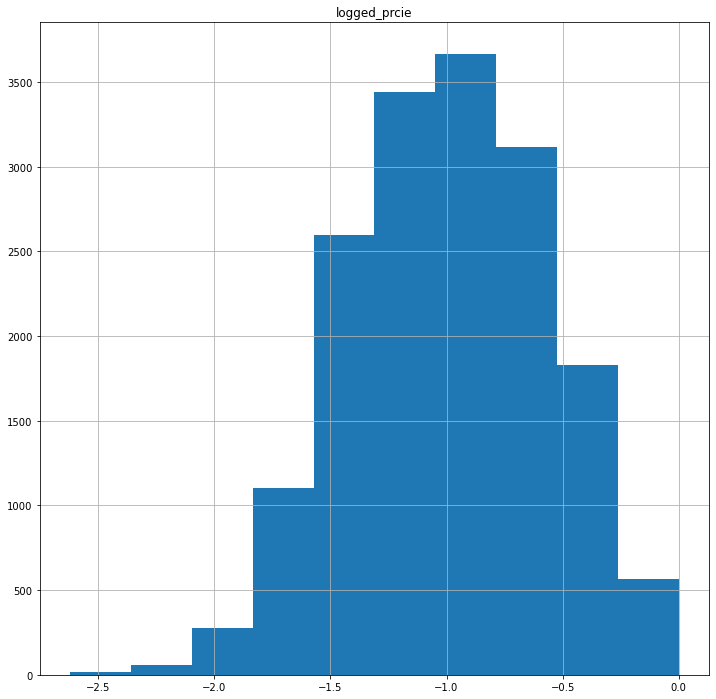

In [110]:
df2.hist(column='logged_prcie')

In [111]:
#Before log transformation sqft_living

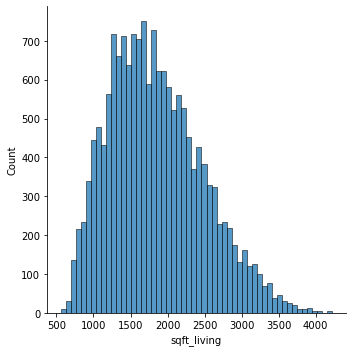

In [112]:
sns.displot(df2['sqft_living'])

In [113]:
df2['logged_sqft_living'] =np.log(df4.sqft_living)
df2.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,logged_prcie,logged_sqft_living
0,221900,3,1,1180,5650,1,3,7,1180,0,1955,47.5112,-122.257,1340,5650,-1.625088,-1.274321
1,538000,3,2,2570,7242,2,3,7,2170,400,1951,47.7210,-122.319,1690,7639,-0.739456,-0.495929
2,180000,2,1,770,10000,1,3,6,770,0,1933,47.7379,-122.233,2720,8062,-1.834358,-1.701200
3,604000,4,3,1960,5000,1,5,7,1050,910,1965,47.5208,-122.393,1360,5000,-0.623740,-0.766891
4,510000,3,2,1680,8080,1,3,8,1680,0,1987,47.6168,-122.045,1800,7503,-0.792904,-0.921041


In [114]:
#After log transformation sqft_living

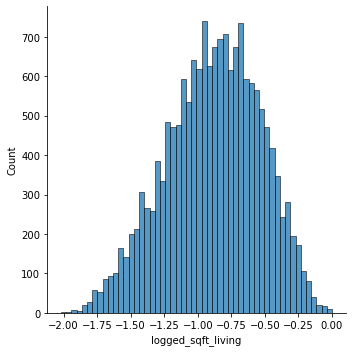

In [115]:
sns.displot(df2['logged_sqft_living'])

In [116]:
df2.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,logged_prcie,logged_sqft_living
0,221900,3,1,1180,5650,1,3,7,1180,0,1955,47.5112,-122.257,1340,5650,-1.625088,-1.274321
1,538000,3,2,2570,7242,2,3,7,2170,400,1951,47.7210,-122.319,1690,7639,-0.739456,-0.495929
2,180000,2,1,770,10000,1,3,6,770,0,1933,47.7379,-122.233,2720,8062,-1.834358,-1.701200
3,604000,4,3,1960,5000,1,5,7,1050,910,1965,47.5208,-122.393,1360,5000,-0.623740,-0.766891
4,510000,3,2,1680,8080,1,3,8,1680,0,1987,47.6168,-122.045,1800,7503,-0.792904,-0.921041


# Train dataset New data set after log Transformation

In [117]:
y = df2['price']
X = df2.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

In [118]:
#train using ridg regeression
ridgeRegressionModel = Ridge()
ridgeRegressionModel.fit(X_train, y_train)

Ridge()

In [119]:
#test new ridge regression

In [120]:
ridgeRegressionModel.score(X_test, y_test)

0.9439548084324078

In [121]:
df2.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,logged_prcie,logged_sqft_living
0,221900,3,1,1180,5650,1,3,7,1180,0,1955,47.5112,-122.257,1340,5650,-1.625088,-1.274321
1,538000,3,2,2570,7242,2,3,7,2170,400,1951,47.7210,-122.319,1690,7639,-0.739456,-0.495929
2,180000,2,1,770,10000,1,3,6,770,0,1933,47.7379,-122.233,2720,8062,-1.834358,-1.701200
3,604000,4,3,1960,5000,1,5,7,1050,910,1965,47.5208,-122.393,1360,5000,-0.623740,-0.766891
4,510000,3,2,1680,8080,1,3,8,1680,0,1987,47.6168,-122.045,1800,7503,-0.792904,-0.921041


In [122]:
df5 = df2.drop(['sqft_living'],
               axis='columns')

In [123]:
y = df5['price']
X = df5.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

In [124]:
ridgeRegressionModel = Ridge()
ridgeRegressionModel.fit(X_train, y_train)

Ridge()

In [125]:
ridgeRegressionModel.score(X_test, y_test)

0.9439548084260442

In [85]:
df4.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,0.196894,0.6,0.333333,0.279621,0.295178,0.333333,0.6,0.777778,0.315508,0.000000,0.970223,0.270707,0.028740
1,0.477374,0.6,0.666667,0.609005,0.378350,0.666667,0.6,0.777778,0.580214,0.285714,0.968238,0.341414,0.038857
2,0.159716,0.4,0.333333,0.182464,0.522439,0.333333,0.6,0.666667,0.205882,0.000000,0.959305,0.549495,0.041009
3,0.535936,0.8,1.000000,0.464455,0.261219,0.333333,1.0,0.777778,0.280749,0.650000,0.975186,0.274747,0.025434
4,0.452529,0.6,0.666667,0.398104,0.422131,0.333333,0.6,0.888889,0.449198,0.000000,0.986104,0.363636,0.038166


In [126]:
def DistributionPlot(RedFunction, BlueFunction):
    plt.figure(figsize=(10, 10))

    ax1 = sns.distplot(RedFunction, hist=False, color="r")
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", ax=ax1)

    plt.show()
    plt.close()

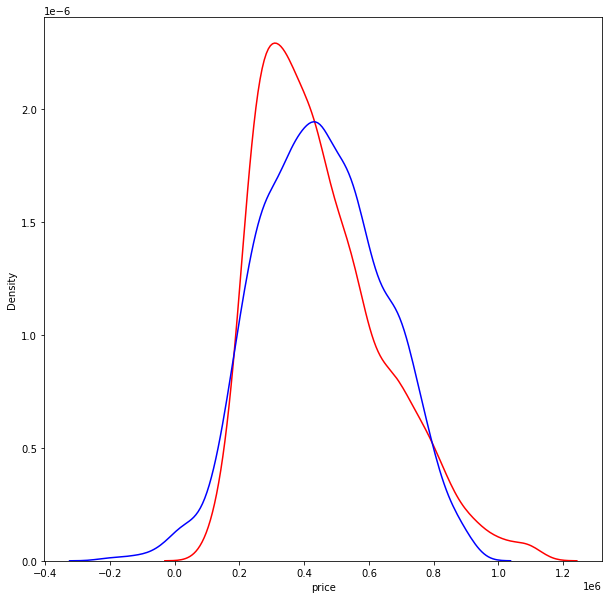

In [127]:
#predicted values of y  for X_Test values and store in 'yplot_test_ridge' variable

yplot_test_ridge = ridgeRegressionModel.predict(X_test)

# Graph for values of y  for X_Test values
DistributionPlot(y_test,yplot_test_ridge)